C:\Users\DELL\AppData\Local\Temp\ipykernel_17268\166212430.py:17: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dataf4=dfObj4.groupby(['MAN_COLL']).sum().sum(level=['MAN_COLL']).reset_index()


41182
    MAN_COLL  FATALS  PERSONS  FATAL_PERCENTAGE_COLLISON
0          0   24367    44271                  59.169054
1          1    2608     8686                   6.332864
2          2    4717    12543                  11.454033
3          3     514     1578                   1.248118
4          4    2098     6141                   5.094459
5          5    5494    16379                  13.340780
6          6     178      515                   0.432228
7          7     543     1923                   1.318537
8          8     495     1576                   1.201981
9          9      88      276                   0.213686
10        10       3       16                   0.007285
11        11      77      238                   0.186975


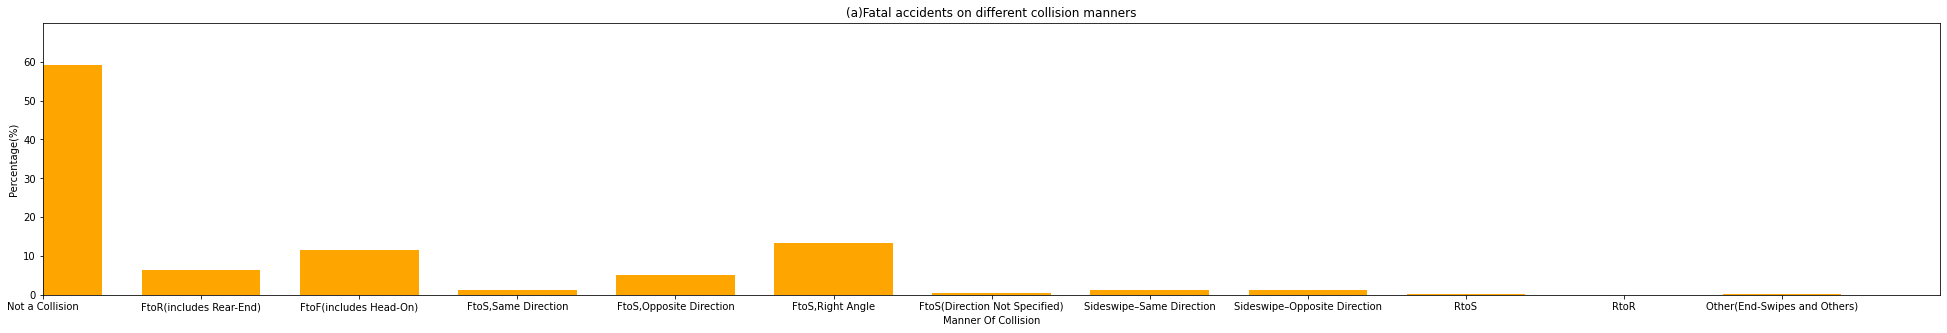

In [2]:
#Collison-Types
import pandas as pd
import matplotlib.pyplot as plt
# setting figure size manually
plt.rcParams["figure.figsize"] = (34,5)
#data=pd.read_csv(r'C:\Users\DELL\Desktop\New folder\ACCIDENTS.csv',encoding='utf-8')
data=pd.read_csv(r'C:\Users\DELL\Desktop\New folder\ACCIDENT.csv')
df=pd.DataFrame(data)
#required columns
cols4=['MAN_COLL','FATALS','PERSONS']
dfObj4=pd.DataFrame(df[cols4])
#Removing unknown values from dataframe 
indexNames4= dfObj4[dfObj4['MAN_COLL']==99].index
#dropping the unknown values
dfObj4.drop(indexNames4,inplace=True )
#total fatals for different groups of collision types
dataf4=dfObj4.groupby(['MAN_COLL']).sum().sum(level=['MAN_COLL']).reset_index()
#counting total fatals
count4=dataf4.FATALS.sum()
#total count
print(count4)
#using lamda apply function to create a new column
dataf4['FATAL_PERCENTAGE_COLLISON']=dataf4.apply(lambda row:(row.FATALS/count4)*100,axis=1)
#refined data
print(dataf4)
#defining x-limits
plt.xlim((0,12))
#defining y-limits
plt.ylim((0,70))

m=['Not a Collision',
   'FtoR(includes Rear-End)',
   'FtoF(includes Head-On)',
   'FtoS,Same Direction',
   'FtoS,Opposite Direction',
   'FtoS,Right Angle',
   'FtoS(Direction Not Specified)',
   'Sideswipe–Same Direction',
   'Sideswipe–Opposite Direction',
   'RtoS',
   'RtoR',
   'Other(End-Swipes and Others)']
#range between each interval
plt.yticks(range(0,70,10))
plt.xticks(range(0,12,1),m)
#x-label
plt.xlabel("Manner Of Collision")
#y-label
plt.ylabel("Percentage(%)")
#title
plt.title("(a)Fatal accidents on different collision manners")
#plotted-graph
plt.bar(dataf4['MAN_COLL'],dataf4['FATAL_PERCENTAGE_COLLISON'],align='center',color='orange',width=0.75)
plt.show()
